In [145]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
df = pd.read_csv('C:/Users/YanSeo/Telkomsel-DSA/churn.csv')
df.info()


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#df[df['class'] == 0].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
state                            5000 non-null int64
account_length                   5000 non-null int64
area_code                        5000 non-null int64
phone_number                     5000 non-null int64
international_plan               5000 non-null int64
voice_mail_plan                  5000 non-null int64
number_vmail_messages            5000 non-null int64
total_day_minutes                5000 non-null float64
total_day_calls                  5000 non-null int64
total_day_charge                 5000 non-null float64
total_eve_minutes                5000 non-null float64
total_eve_calls                  5000 non-null int64
total_eve_charge                 5000 non-null float64
total_night_minutes              5000 non-null float64
total_night_calls                5000 non-null int64
total_night_charge               5000 non-null float64
total_intl_minutes               

In [146]:
#asumsi class = 0 adalah stayed dan class = 1 adalah churn 
#add flag with  value 0 dengan stayed dan value 1 dengan chrun 
df['flag'] = np.where((df['class'] == 0), "Stayed", "Churn")
df.head(10)

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class,flag
0,16,128,415,2845,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,Stayed
1,35,107,415,2301,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,Stayed
2,31,137,415,1616,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,Stayed
3,35,84,408,2510,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,Stayed
4,36,75,415,155,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,Stayed
5,1,118,510,3355,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,Stayed
6,19,121,510,1516,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,Stayed
7,24,147,415,116,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,Stayed
8,18,117,408,425,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0,Stayed
9,49,141,415,163,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,Stayed


### 1. Berapakah jumlah pelanggan yang ada pada dataset tersebut, dan berapakah pelanggan dari masing kategori churn/nonchurn ?

total phone number :  5000
Stayed    4293
Churn      707
Name: flag, dtype: int64


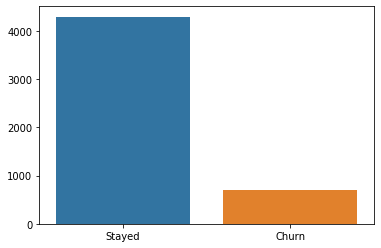

In [147]:
print("total phone number : ", len(df['phone_number']))
#df_cnc = df.groupby(['flag']).agg({'phone_number':'count'}).reset_index()
df_cnc = df.flag.value_counts()
print(df_cnc)
sns.barplot(df_cnc.index, df_cnc.values)

### 2. State manakah yang memiliki pelanggan dengan jumlah churn yang lebih banyak ? (urutkan dengan churn paling tertinggi top 5 state)


In [148]:
df_churned = df[df['flag'] == 'Churn']
churned_top_5 =df_churned.groupby(['state','flag']).agg({'phone_number':'count'}).sort_values('phone_number', ascending=False).reset_index()
churned_top_5.head(5)


,state,flag,phone_number
0,31,Churn,28
1,43,Churn,26
2,47,Churn,24
3,49,Churn,22
4,26,Churn,21


### 3. Area-code manakah yang memiliki pelanggan dengan jumlah churn yang lebih banyak ? (urutkan dengan churn paling tertinggi top 5 state)


In [149]:
df_churned = df[df['flag'] == 'Churn']
churned_top_3_area =df_churned.groupby(['area_code','flag']).agg({'phone_number':'count'}).sort_values('phone_number', ascending=False).reset_index()
churned_top_3_area.head(3)


,area_code,flag,phone_number
0,415,Churn,346
1,510,Churn,184
2,408,Churn,177


### 4. Bandingkan profile pelanggan yang melakukan churn dengan stayed 

In [150]:
df = df.loc[:,['account_length', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'flag']]
#df.head()
df.groupby('flag').describe()

account_length                                                        total_day_minutes                                                          total_day_calls                                                        total_day_charge                                                         
                count        mean        std  min   25%    50%    75%    max             count        mean        std  min    25%    50%     75%    max           count        mean        std  min   25%    50%    75%    max            count       mean        std  min     25%    50%     75%    max
flag                                                                                                                                                                                                                                                                                                    
Churn           707.0  102.332390  39.396993  1.0  76.0  102.0  126.5  225.0             707.0  207.870580  68.576475  0.0  153.5  215.9  266.45  351.5           707.0  100.817539  20.757110  0.0  88.0  101.0  115.0  165.0            707.0  35.338416  11.658195  0.0  26.095  36.70  45.295  59.76
Stayed         4293.0   99.917074  39.737531  1.0  73.0   99.0  127.0  243.0            4293.0  175.746564  49.634575  0.0  142.9  178.0  210.70  315.6          4293.0   99.899604  19.674019  0.0  87.0  100.0  113.0  163.0           4293.0  29.877494   8.437810  0.0  24.290  30.26  35.820  53.65

### 5. Check relationship antara variables dan jelaskan


In [151]:
df_churned = df.loc[:,['account_length', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'flag']]

df_churned = df_churned[df_churned.flag == 'Churn']
df_churned.corr()

,account_length,total_day_minutes,total_day_calls,total_day_charge
account_length,1.000000,0.023475,0.028084,0.023478
total_day_minutes,0.023475,1.000000,0.031438,1.000000
total_day_calls,0.028084,0.031438,1.000000,0.031430
total_day_charge,0.023478,1.000000,0.031430,1.000000
